In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [3]:
# This project aim to develop a machine learning model to test Daimler's car in efficient way resulting in lowwer 
# cabron-dioxide emission without reducing Daimler's Standards

## Loading data 

In [2]:
mcd_train_df = pd.read_csv("C:/Users/ribis/Documents/Simplilearn_Data Scientist/Machine learning/project to be submitted/Machine-Learning--Projects-master/Projects/Projects for Submission/Project 1 - Mercedes-Benz Greener Manufacturing/Dataset for the project/train.csv")

mcd_test_df = pd.read_csv("C:/Users/ribis/Documents/Simplilearn_Data Scientist/Machine learning/project to be submitted/Machine-Learning--Projects-master/Projects/Projects for Submission/Project 1 - Mercedes-Benz Greener Manufacturing/Dataset for the project/test.csv")

## Checking data

In [3]:
mcd_train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
mcd_test_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [5]:
mcd_train_df.info

<bound method DataFrame.info of         ID       y  X0 X1  X2 X3 X4  X5 X6 X8  ...  X375  X376  X377  X378  \
0        0  130.81   k  v  at  a  d   u  j  o  ...     0     0     1     0   
1        6   88.53   k  t  av  e  d   y  l  o  ...     1     0     0     0   
2        7   76.26  az  w   n  c  d   x  j  x  ...     0     0     0     0   
3        9   80.62  az  t   n  f  d   x  l  e  ...     0     0     0     0   
4       13   78.02  az  v   n  f  d   h  d  n  ...     0     0     0     0   
...    ...     ...  .. ..  .. .. ..  .. .. ..  ...   ...   ...   ...   ...   
4204  8405  107.39  ak  s  as  c  d  aa  d  q  ...     1     0     0     0   
4205  8406  108.77   j  o   t  d  d  aa  h  h  ...     0     1     0     0   
4206  8412  109.22  ak  v   r  a  d  aa  g  e  ...     0     0     1     0   
4207  8415   87.48  al  r   e  f  d  aa  l  u  ...     0     0     0     0   
4208  8417  110.85   z  r  ae  c  d  aa  g  w  ...     1     0     0     0   

      X379  X380  X382  X383  X

## This shows features X0 to X8 are categorical

In [6]:
print("The shape of train data set is:", mcd_train_df.shape)
print("The shape of test data set is:", mcd_test_df.shape)

The shape of train data set is: (4209, 378)
The shape of test data set is: (4209, 377)


## checking for null data

In [7]:
mcd_train_df.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

## There is no null data in train dataset

## checking uniqe value in each columns

In [8]:
for col in mcd_train_df:
    print(mcd_train_df[col].unique())

[   0    6    7 ... 8412 8415 8417]
[130.81  88.53  76.26 ...  85.71 108.77  87.48]
['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
['a' 'e' 'c' 'f' 'd' 'b' 'g']
['d' 'b' 'c' 'a']
['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b']
['o' 'x' 'e' 'n' 's' 'a' 'h' 'p' 'm' 'k' 'd' 'i' 'v' 'j' 'b' 'q' 'w' 'g'
 'y' 'l' 'f' 'u' 'r' 't' 'c']
[0 1]
[0]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[0

## checking for statistics

In [9]:
mcd_train_df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,4209.0,NaN,NaN,NaN,4205.960798,2437.608688,0.0,2095.0,4220.0,6314.0,8417.0
y,4209.0,NaN,NaN,NaN,100.669318,12.679381,72.11,90.82,99.15,109.01,265.32
X0,4209,47,z,360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X1,4209,27,aa,833,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X2,4209,44,as,1659,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
X380,4209.0,NaN,NaN,NaN,0.008078,0.089524,0.0,0.0,0.0,0.0,1.0
X382,4209.0,NaN,NaN,NaN,0.007603,0.086872,0.0,0.0,0.0,0.0,1.0
X383,4209.0,NaN,NaN,NaN,0.001663,0.040752,0.0,0.0,0.0,0.0,1.0
X384,4209.0,NaN,NaN,NaN,0.000475,0.021796,0.0,0.0,0.0,0.0,1.0


## Looking for std of the data as variance is square of std, if std is zero then varinace is zero

In [10]:
x = mcd_train_df.std()

In [11]:
lst = []
for index, val in enumerate(x):
    if val == 0:
        a = index
        lst.append(a)

In [12]:
lst

[3, 83, 97, 219, 221, 254, 275, 276, 279, 283, 315, 332]

In [13]:
x[[3, 83, 97, 219, 221, 254, 275, 276, 279, 283, 315, 332]]

X11     0.0
X93     0.0
X107    0.0
X233    0.0
X235    0.0
X268    0.0
X289    0.0
X290    0.0
X293    0.0
X297    0.0
X330    0.0
X347    0.0
dtype: float64

In [14]:
# Listing all columns that have zero standard deviation
outliers = mcd_train_df[["ID","X11","X93","X107","X233","X268", "X289", "X290", "X293", "X297", "X330", "X347"]]

In [15]:
outliers

,ID,X11,X93,X107,X233,X268,X289,X290,X293,X297,X330,X347
0,0,0,0,0,0,0,0,0,0,0,0,0
1,6,0,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,0,0
4,13,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,0,0,0,0,0,0,0,0,0,0,0
4205,8406,0,0,0,0,0,0,0,0,0,0,0
4206,8412,0,0,0,0,0,0,0,0,0,0,0
4207,8415,0,0,0,0,0,0,0,0,0,0,0


## removing all the columns that has zero std

In [16]:
mcd_train_filt_df = mcd_train_df.drop(outliers, axis=1)

mcd_test_filt_df = mcd_test_df.drop(outliers, axis=1)

In [17]:
print ("The shape of train dataset is:", mcd_train_filt_df.shape)
print ("The shape of test dataset is:", mcd_test_filt_df.shape)

The shape of train dataset is: (4209, 366)
The shape of test dataset is: (4209, 365)


In [18]:
X_features = mcd_train_filt_df.drop("y", axis=1)

In [19]:
X_features.shape

(4209, 365)

## Applying label encoder to train dataset that has categorical data from columns X0 to X8

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()



In [21]:
X0 = X_features.iloc[:,0]
X_features["X0"] = le.fit_transform(X0)

In [22]:
X1 = X_features.iloc[:,1]
X_features["X1"] = le.fit_transform(X1)

In [23]:
X2 = X_features.iloc[:,2]
X_features["X2"] = le.fit_transform(X2)

In [24]:
X3 = X_features.iloc[:,3]
X_features["X3"] = le.fit_transform(X3)

In [25]:
X4 = X_features.iloc[:,4]
X_features["X4"] = le.fit_transform(X4)

In [26]:
X5 = X_features.iloc[:,5]
X_features["X5"] = le.fit_transform(X5)

In [27]:
X6 = X_features.iloc[:,6]
X_features["X6"] = le.fit_transform(X6)

In [28]:
X7 = X_features.iloc[:,7]
X_features["X7"] = le.fit_transform(X7)


In [29]:
X8 = X_features.iloc[:,8]
X_features["X8"] = le.fit_transform(X8)

In [30]:
X_features.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X376,X377,X378,X379,X380,X382,X383,X384,X385,X7
0,32,23,17,0,3,24,9,0,0,0,...,0,1,0,0,0,0,0,0,0,14
1,32,21,19,4,3,28,11,0,0,0,...,0,0,0,0,0,0,0,0,0,14
2,20,24,34,2,3,27,9,0,0,0,...,0,0,0,0,0,1,0,0,0,23
3,20,21,34,5,3,27,11,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,20,23,34,5,3,12,3,0,0,0,...,0,0,0,0,0,0,0,0,0,13


## Applying label encoder to test dataset that has categorical data from columns 


In [31]:
X0_t = mcd_test_filt_df.iloc[:,0]
mcd_test_filt_df["X0"] = le.fit_transform(X0_t)

In [32]:
X1_t = mcd_test_filt_df.iloc[:,1]
mcd_test_filt_df["X1"] = le.fit_transform(X1_t)

In [33]:
X2_t = mcd_test_filt_df.iloc[:,2]
mcd_test_filt_df["X2"] = le.fit_transform(X2_t)

In [34]:
X3_t = mcd_test_filt_df.iloc[:,3]
mcd_test_filt_df["X3"] = le.fit_transform(X3_t)

In [35]:
X4_t = mcd_test_filt_df.iloc[:,4]
mcd_test_filt_df["X4"] = le.fit_transform(X4_t)

In [36]:
X5_t = mcd_test_filt_df.iloc[:,5]
mcd_test_filt_df["X5"] = le.fit_transform(X5_t)

In [37]:
X6_t = mcd_test_filt_df.iloc[:,6]
mcd_test_filt_df["X6"] = le.fit_transform(X6_t)

In [38]:
X7_t = mcd_test_filt_df.iloc[:,7]
mcd_test_filt_df["X7"] = le.fit_transform(X7_t)

In [39]:
X8_t = mcd_test_filt_df.iloc[:,8]
mcd_test_filt_df["X8"] = le.fit_transform(X8_t)

In [40]:
mcd_test_filt_df.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X376,X377,X378,X379,X380,X382,X383,X384,X385,X7
0,21,23,34,5,3,26,0,0,0,0,...,0,0,1,0,0,0,0,0,0,22
1,42,3,8,0,3,9,6,0,0,0,...,0,1,0,0,0,0,0,0,0,24
2,21,23,17,5,3,0,9,0,0,0,...,0,0,1,0,0,0,0,0,0,9
3,21,13,34,5,3,31,11,0,0,0,...,0,0,1,0,0,0,0,0,0,13
4,45,20,17,2,3,30,8,0,0,0,...,0,0,0,0,0,0,0,0,0,12


In [41]:
y = mcd_train_df["y"]
y.head()

0    130.81
1     88.53
2     76.26
3     80.62
4     78.02
Name: y, dtype: float64

## Plotting y target 

<AxesSubplot:xlabel='X5', ylabel='y'>

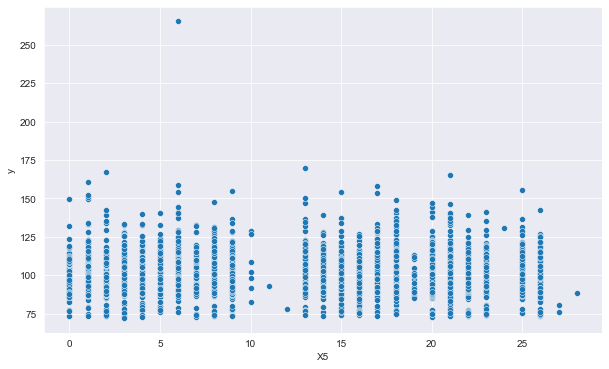

In [42]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
sns.scatterplot(x = X_features.iloc[:,5], y = y, data = X_features )

<AxesSubplot:xlabel='y', ylabel='Density'>

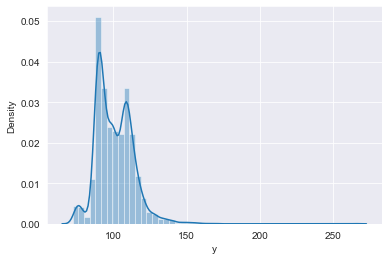

In [43]:
sns.distplot(y)

<AxesSubplot:>

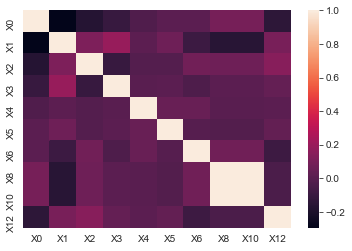

In [44]:
sns.heatmap((mcd_test_filt_df.iloc[:,0:10].corr()))

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.3, random_state=21)

In [46]:
print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is:", X_test.shape)
print("The shape of y_train is:", y_train.shape)
print("The shape of y_test is:", y_test.shape)

The shape of X_train is: (2946, 366)
The shape of X_test is: (1263, 366)
The shape of y_train is: (2946,)
The shape of y_test is: (1263,)


## Standardising X_train and X_test data

In [47]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.fit_transform(X_test)

## Applying pca method to redcue dimensionality of X_features datasets

In [48]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.fit_transform(X_test_scaled)

In [49]:
pca.explained_variance_ratio_.astype(float)

array([7.28392754e-02, 6.24199919e-02, 5.25689856e-02, 3.89660708e-02,
       3.70925602e-02, 3.62858991e-02, 3.09482892e-02, 2.40051571e-02,
       2.24987527e-02, 2.05920732e-02, 1.77994133e-02, 1.69730672e-02,
       1.53095868e-02, 1.41178423e-02, 1.37121387e-02, 1.31108580e-02,
       1.20466491e-02, 1.14998460e-02, 1.11317306e-02, 1.06939174e-02,
       1.02783829e-02, 1.00603067e-02, 9.37705374e-03, 9.17098514e-03,
       9.06175048e-03, 9.00460747e-03, 8.42655275e-03, 8.11088594e-03,
       7.97956151e-03, 7.65734103e-03, 7.59416557e-03, 7.31729900e-03,
       7.09005843e-03, 6.92426678e-03, 6.78746552e-03, 6.59327942e-03,
       6.58918167e-03, 6.34275004e-03, 6.30648911e-03, 6.20433324e-03,
       5.94438281e-03, 5.73213684e-03, 5.63357268e-03, 5.52574981e-03,
       5.48940889e-03, 5.37098417e-03, 5.18055918e-03, 5.08173225e-03,
       4.91177119e-03, 4.88229582e-03, 4.80861055e-03, 4.70465079e-03,
       4.65558738e-03, 4.56478235e-03, 4.50210725e-03, 4.44206397e-03,
      

## Selecting features that have significant pca value

In [50]:
a = []
for i in pca.explained_variance_ratio_:
    if i > 0.001:
            a.append(i)
print(sum(a))
print(len(a))

0.9704014875106765
138


# I am selecting first 138 features that covers 97% data features 

In [51]:
X_train_pca_filt = X_train_pca[:, 0:138]
X_test_pca_filt = X_test_pca[:, 0:138]
print(X_train_pca_filt.shape)
print(X_test_pca_filt.shape)

(2946, 138)
(1263, 138)


In [52]:
X_train_pca_filt.shape


(2946, 138)

In [53]:
y_train.shape

(2946,)

# Building XGboost model

In [54]:
#pip install xgboost

In [55]:
import xgboost as xgb
params ={"objective": "reg:linear" , "colsample_bytree" :0.3, "eta": 0.1, "max_depth" : 5, "alpha" : 10}


## coverting train and test data into DMatrix

In [56]:
D_train = xgb.DMatrix(X_train_pca_filt, label = y_train)
D_test = xgb.DMatrix(X_test_pca_filt)



## Initialising params

In [92]:
#model_xgb = xgb.XGBRegressor(param)
#xgb_model = xgb.XGBRegressor(objective = "reg:linear", colsample_bytree = 0.3, learnining_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)

xgb_model = xgb.XGBRegressor()
xgb_model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [93]:
xgb_model.fit(X_train_pca_filt, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=6, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [94]:
score = xgb_model.score(X_train_pca_filt, y_train)
print("The score of training dataset for xgb is:", score)

The score of training dataset for xgb is: 0.9747449885340035


In [95]:
# Prediction test data set using the developed model
y_test_pred_xgb = xgb_model.predict(X_test_pca_filt)

In [101]:
from sklearn.metrics import mean_squared_error
print("The RMSE is: ", np.sqrt(mean_squared_error(y_test, y_test_pred_xgb)))

The RMSE is:  12.338109314956029


Text(0, 0.5, 'data points')

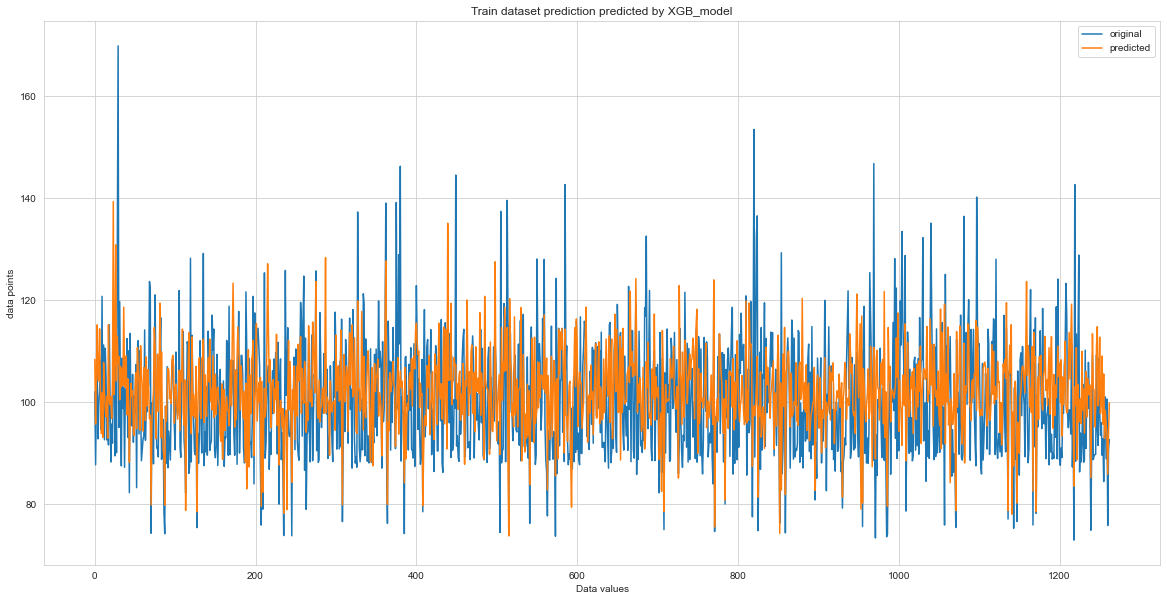

In [62]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
ax = range(len(y_test))
plt.plot(ax, y_test, label = "original")
plt.plot(ax, y_test_pred_xgb, label = "predicted")
plt.legend()
plt.title("Train dataset prediction predicted by XGB_model")
plt.xlabel("Data values")
plt.ylabel("data points")

## This graph exhibits the training dataset was predicted by model with 98% accuracy.

## Plotting tree

In [103]:
xg_reg = xgb.train(params=params, dtrain=D_train, num_boost_round=10)

[16:23:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [63]:
#pip install graphviz

Note: you may need to restart the kernel to use updated packages.


## Testing accuracy of the model using provided test dataset only

In [68]:
mcd_test_filt_df.head()
print("shape of test dataset is:", mcd_test_filt_df.shape)

shape of test dataset is: (4209, 366)


In [69]:
X_features.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X376,X377,X378,X379,X380,X382,X383,X384,X385,X7
0,32,23,17,0,3,24,9,0,0,0,...,0,1,0,0,0,0,0,0,0,14
1,32,21,19,4,3,28,11,0,0,0,...,0,0,0,0,0,0,0,0,0,14
2,20,24,34,2,3,27,9,0,0,0,...,0,0,0,0,0,1,0,0,0,23
3,20,21,34,5,3,27,11,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,20,23,34,5,3,12,3,0,0,0,...,0,0,0,0,0,0,0,0,0,13


In [105]:
X_train1 = X_features.iloc[:, 0:138]
y_train1 = y

In [106]:
print("The sahpe of X_train data is:", X_train1.shape)
print("The sahpe of y_train data is:", y_train1.shape)

The sahpe of X_train data is: (4209, 138)
The sahpe of y_train data is: (4209,)


## Making equal dimenstion of test dataset

In [89]:
# same columns are removed from test dataset as done in training dataset using pca method
X_test_1 = mcd_test_filt_df.iloc[:, 0:138]
X_test_1.shape


(4209, 138)

In [107]:
# Standardising data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_test_2 = ss.fit_transform(X_test_1)

In [83]:
#random sampling of data are chosen for predictiong y-value from above developed xgb model
#X_test_2 = X_test_1.sample(n=1263, random_state=5)

In [91]:
y_test.shape

(1263,)

## Building XGBboost model

In [108]:
y_test_xgb_ped_1 = xgb_model.predict(X_test_2)

## visualising in graph

Text(0.5, 1.0, 'Test dataset predicted by XGB model')

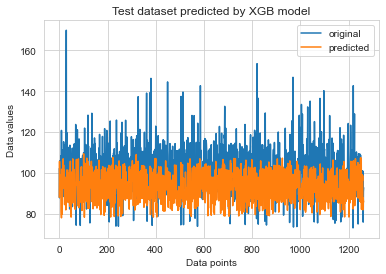

In [529]:
ax1 = range(len(y_test))
plt.plot(ax1, y_test, label="original")
plt.plot(ax1, y_test_xgb_ped_1 , label = "predicted")
plt.ylabel("Data values")
plt.xlabel("Data points")
plt.legend()
plt.title("Test dataset predicted by XGB model")

## Here, graph representst the original y_test dataset from training dataset and the predicted is the prediction made by mmodel on testing dataset. The prediction is within 15% errorbar of y_test data, suggesting it is a good model

In [512]:
D_test_2 = xgb.DMatrix(X_test_2, label = y_test)

In [513]:
params1 ={"objective": "reg:linear" , "colsample_bytree" :0.3, "eta": 0.02, "max_depth" : 4}

In [514]:
cv_results_1 = xgb.cv(dtrain=D_test_2, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [515]:
cv_results_1.tail()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
45,11.075122,0.280188,12.395479,0.638371
46,11.021130,0.266479,12.405604,0.621309
47,10.952054,0.259684,12.414119,0.632496
48,10.910387,0.241485,12.420145,0.621898
49,10.878326,0.235385,12.422502,0.611517


## Graphical visualisation of train_rmse and test_rmse

<AxesSubplot:ylabel='test-rmse-mean'>

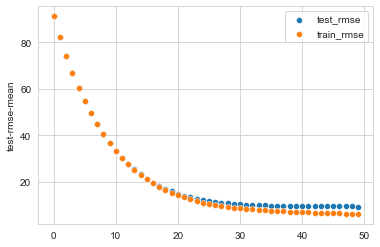

In [517]:
ax = range(len(cv_results_1))
sns.scatterplot(ax, cv_results["test-rmse-mean"], data=cv_results_1, label="test_rmse")
sns.scatterplot(ax, cv_results["train-rmse-mean"], data=cv_results_1, label="train_rmse")

## The graph predicts the testing and training rmse are almost similar suggesting this is an appropriate model.